Figure-6.ipynb
------------------------------------------------------------------------------
Purpose:  
- Generate Figure 6 (panels A - D) illustrating data quality for our US sample (pings per trip, pings per day, time between pings, trips per day). 

Usage:
- Change fp variable to replication filepath.
- Run all cells.
  
Requirements:
- Python 3
- Packages: matplotlib 3.9.2, pandas 2.2.2, numpy 1.26.4

Inputs:
- sample_statistics/trips_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- sample_statistics/pings_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- sample_statistics/pings_per_trip (produced on Spectus platform using process_trips_into_outputs_us.ipynb)
- sample_statistics/trips_per_day (produced on Spectus platform using process_trips_into_outputs_us.ipynb)

Outputs:
- figures/fig6.png


In [1]:
fp = '../'
fp_input = fp + 'data/'
fp_output = fp + 'figures/'


In [2]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Helvetica'
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


### Define helper functions.

In [3]:
def read_orc(fp):
    if fp[-1] != '/':
        fp += '/'
    files = os.listdir(fp)
    dfs = []
    for file in files:
        dfs.append(pd.read_orc(fp+file))
    return pd.concat(dfs)


### Read in data.

In [4]:
trips_per_day = read_orc(f'{fp_input}sample_statistics/trips_per_day/')
pings_per_day = read_orc(f'{fp_input}sample_statistics/pings_per_day/')
pings_per_trip = read_orc(f'{fp_input}sample_statistics/pings_per_trip/')
ping_time = read_orc(f'{fp_input}sample_statistics/ping_time/')

ping_time_all = ping_time.pivot(columns={'filter'},index='ping_time',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index()
trips_pd_all = trips_per_day.pivot(columns={'filter'},index='trips_per_day',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('trips_per_day')
pings_pt_all = pings_per_trip.pivot(columns={'filter'},index='pings_per_trip',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('pings_per_trip')
pings_pd_all = pings_per_day.pivot(columns={'filter'},index='pings_per_day',values='users').rename(columns={i:f'users{i}' for i in range(1,5)}).reset_index().sort_values('pings_per_day')

ping_time_all = ping_time_all.sort_values('ping_time')
pings_pt_all = pings_pt_all.sort_values('pings_per_trip')
pings_pd_all = pings_pd_all.sort_values('pings_per_day')
trips_pd_all = trips_pd_all.sort_values('trips_per_day')

trips_pd_all = trips_pd_all.sort_values('trips_per_day')
trips_pd_all['trips_per_day_rdd'] = np.ceil(trips_pd_all.trips_per_day)
trips_pd_all_rdd = trips_pd_all.groupby('trips_per_day_rdd').agg({f'users{i}':'sum' for i in range(1,5)}).reset_index()

### Create figure.

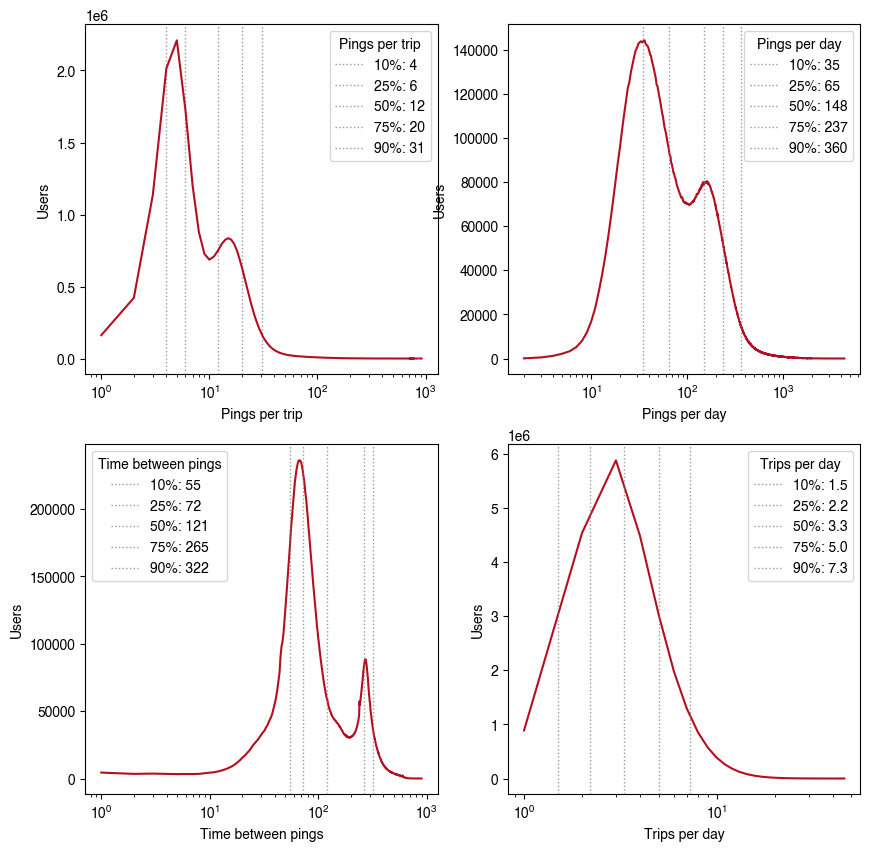

In [5]:
colors = ['#46ACC8','#E58601','#B40F20','#e2d200']

fig,axs = plt.subplots(2,2,figsize=(10,10))

bax = axs[0,0]
pings_pt_all['users_cumul'] = pings_pt_all.users1.cumsum()/pings_pt_all.users1.sum()
med = pings_pt_all[pings_pt_all.users_cumul>.5].pings_per_trip.values[0]
q90=pings_pt_all[pings_pt_all.users_cumul>.90].pings_per_trip.values[0]
q75=pings_pt_all[pings_pt_all.users_cumul>.75].pings_per_trip.values[0]
q25=pings_pt_all[pings_pt_all.users_cumul>.25].pings_per_trip.values[0]
q10=pings_pt_all[pings_pt_all.users_cumul>.1].pings_per_trip.values[0]
bax.axvline(q10,label=f'10%: {int(np.round(q10))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q25,label=f'25%: {int(np.round(q25))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(med,label=f'50%: {int(np.round(med))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q75,label=f'75%: {int(np.round(q75))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q90,label=f'90%: {int(np.round(q90))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.plot(pings_pt_all.pings_per_trip,pings_pt_all.users1,color=colors[2])
bax.set_ylabel('Users')
bax.set_xlabel('Pings per trip')
bax.legend(title='Pings per trip')
bax.set_xscale('log')

bax = axs[0,1]
bax.plot(pings_pd_all.fillna(0).pings_per_day,pings_pd_all.fillna(0).users1,color=colors[2])
pings_pd_all['users_cumul'] = pings_pd_all.users1.cumsum()/pings_pd_all.users1.sum()
med = pings_pd_all[pings_pd_all.users_cumul>.5].pings_per_day.values[0]
q90=pings_pd_all[pings_pd_all.users_cumul>.90].pings_per_day.values[0]
q75=pings_pd_all[pings_pd_all.users_cumul>.75].pings_per_day.values[0]
q25=pings_pd_all[pings_pd_all.users_cumul>.25].pings_per_day.values[0]
q10=pings_pd_all[pings_pd_all.users_cumul>.1].pings_per_day.values[0]
bax.axvline(q10,label=f'10%: {int(np.round(q10))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q25,label=f'25%: {int(np.round(q25))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(med,label=f'50%: {int(np.round(med))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q75,label=f'75%: {int(np.round(q75))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q90,label=f'90%: {int(np.round(q90))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.set_xscale('log')
bax.set_ylabel('Users')
bax.set_xlabel('Pings per day')
# bax.set_title('Pings per day')
bax.legend(title='Pings per day')

bax = axs[1,0]
bax.plot(ping_time_all.ping_time,ping_time_all.users1,color=colors[2])
ping_time_all['users_cumul'] = ping_time_all.users1.cumsum()/ping_time_all.users1.sum()
med = ping_time_all[ping_time_all.users_cumul>.5].ping_time.values[0]
q90=ping_time_all[ping_time_all.users_cumul>.90].ping_time.values[0]
q75=ping_time_all[ping_time_all.users_cumul>.75].ping_time.values[0]
q25=ping_time_all[ping_time_all.users_cumul>.25].ping_time.values[0]
q10=ping_time_all[ping_time_all.users_cumul>.1].ping_time.values[0]
bax.axvline(q10,label=f'10%: {int(np.round(q10))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q25,label=f'25%: {int(np.round(q25))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(med,label=f'50%: {int(np.round(med))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q75,label=f'75%: {int(np.round(q75))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q90,label=f'90%: {int(np.round(q90))}',color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.set_xscale('log')
bax.set_ylabel('Users')
bax.set_xlabel('Time between pings')
bax.legend(title = 'Time between pings')

bax = axs[1,1]
bax.plot(trips_pd_all_rdd.trips_per_day_rdd,trips_pd_all_rdd.users1,color=colors[2])
trips_pd_all['users_cumul'] = trips_pd_all.users1.cumsum()/trips_pd_all.users1.sum()
med = trips_pd_all[trips_pd_all.users_cumul>.5].trips_per_day.values[0]
q90=trips_pd_all[trips_pd_all.users_cumul>.90].trips_per_day.values[0]
q75=trips_pd_all[trips_pd_all.users_cumul>.75].trips_per_day.values[0]
q25=trips_pd_all[trips_pd_all.users_cumul>.25].trips_per_day.values[0]
q10=trips_pd_all[trips_pd_all.users_cumul>.1].trips_per_day.values[0]
bax.axvline(q10, label=f'10%: {np.round(q10, 2):.1f}', color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q25, label=f'25%: {np.round(q25, 2):.1f}', color='grey',linestyle='dotted',linewidth=1, alpha=.8)
bax.axvline(med, label=f'50%: {np.round(med, 2):.1f}', color='grey',linestyle='dotted',linewidth=1, alpha=.8)
bax.axvline(q75, label=f'75%: {np.round(q75, 2):.1f}', color='grey',linestyle='dotted',linewidth=1,alpha=.8)
bax.axvline(q90, label=f'90%: {np.round(q90, 2):.1f}', color='grey',linestyle='dotted',linewidth=1, alpha=.8)
bax.legend(title="Trips per day")


bax.set_xscale("log")
bax.set_ylabel('Users')
bax.set_xlabel('Trips per day')
plt.savefig(f'{fp_output}fig6.png',dpi=300)


In [6]:
trips_pd_all

filter,trips_per_day,users1,users2,users3,users4,trips_per_day_rdd,users_cumul
0,1.000000,887651.0,511255.0,229657.0,81092.0,1.0,0.035754
1,1.100000,78283.0,49549.0,27258.0,12502.0,2.0,0.038907
2,1.200000,184348.0,117602.0,65709.0,29152.0,2.0,0.046333
3,1.300000,476476.0,307675.0,170441.0,75053.0,2.0,0.065525
4,1.400000,325434.0,220267.0,134528.0,66188.0,2.0,0.078633
...,...,...,...,...,...,...,...
416,44.299999,10.0,14.0,NaN,NaN,45.0,1.000000
417,44.599998,NaN,10.0,NaN,NaN,45.0,NaN
418,44.799999,NaN,NaN,10.0,NaN,45.0,NaN
419,45.200001,NaN,10.0,NaN,NaN,46.0,NaN
